# Import library

Download the data source from here 
The dataset is referenced from the Digit Recognizer competition on Kaggle and can be accessed here: https://www.kaggle.com/c/digit-recognizer/data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import time

# Load dataset

In [2]:
digit = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
# check the five rows
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# printing the shape of the database
digit.shape

(42000, 785)

In [5]:
# print some imformation about database
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# print descriptive statistic on numerical columns
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
# Target variable 
digit.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Separating the label values and column values

In [8]:
y = digit["label"]
x = digit.loc[:, digit.columns != "label"]

# Feature scaling

In [9]:
X_std = StandardScaler().fit_transform(x)

# split into training and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.25, random_state = 42, stratify = y)

In [11]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (31500, 784)
X_test:  (10500, 784)
y_train:  (31500,)
y_test:  (10500,)


# Logistic regression 

In [12]:
log  = LogisticRegression(random_state = 42, multi_class="multinomial", solver="saga", max_iter=200)

start_time = time.time()
log.fit(X_train, y_train)
end_time = time.time()

time1 = end_time-start_time
print("Time elapsed: ",time1)

y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

Time elapsed:  289.94637537002563
Accuracy Score (Train Data): 0.934
Accuracy Score (Test Data): 0.916
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1033
           1       0.92      0.98      0.95      1171
           2       0.93      0.90      0.91      1044
           3       0.91      0.89      0.90      1088
           4       0.90      0.92      0.91      1018
           5       0.88      0.86      0.87       949
           6       0.95      0.96      0.96      1034
           7       0.93      0.94      0.93      1100
           8       0.89      0.84      0.87      1016
           9       0.89      0.89      0.89      1047

    accuracy                           0.92     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.92      0.92      0.92     10500



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# PCA

In [25]:
# Here we will aim to explain 98% of the variance with PCA. We could reduce or increase it as per the needs of our project
pca = PCA(.96)

In [26]:
lower_dimensional_data = pca.fit_transform(X_train)

approximation = pca.inverse_transform(lower_dimensional_data)

In [27]:
pca.n_components_

270

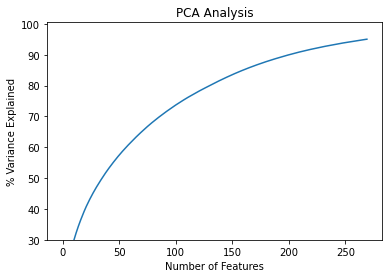

In [28]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)* 100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [ ]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x.values[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('270 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [18]:
# fit and transform  the data
pca = PCA(n_components=443, random_state = 0)
X_pca_t = pca.fit_transform(X_train)
print(X_pca_t.shape)

(31500, 443)


In [19]:
# transform  the data
X_std_t = pca.transform(X_std)
print(X_std_t.shape)

(42000, 443)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_std_t, y, test_size=0.25, random_state=42, stratify = y)

In [21]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (31500, 443)
X_test:  (10500, 443)
y_train:  (31500,)
y_test:  (10500,)


# Logistic Regression on PCA reduced dataset


In [22]:
log  = LogisticRegression(random_state = 42, multi_class="multinomial", solver="saga", max_iter=200)

start_time = time.time()

log.fit(X_train, y_train)

end_time = time.time()
time1 = end_time-start_time
print("Time elapsed: ",time1)

y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

Time elapsed:  166.89874815940857
Accuracy Score (Train Data): 0.932
Accuracy Score (Test Data): 0.916
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1033
           1       0.92      0.98      0.95      1171
           2       0.93      0.90      0.91      1044
           3       0.91      0.89      0.90      1088
           4       0.90      0.92      0.91      1018
           5       0.88      0.87      0.87       949
           6       0.95      0.96      0.96      1034
           7       0.93      0.94      0.93      1100
           8       0.89      0.84      0.87      1016
           9       0.89      0.90      0.89      1047

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [24]:
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb